post corrections - dupuis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp



In [3]:
# Load all the provided CSV files
nyon_2023 = pd.read_csv('./data/combined_data_v1/nyon_2023.csv')
nyon_2022 = pd.read_csv('./data/combined_data_v1/nyon_2022.csv')
rolle_2022 = pd.read_csv('./data/combined_data_v1/rolle_2022.csv')
rolle_2023 = pd.read_csv('./data/combined_data_v1/rolle_2023.csv')
vevey_2022 = pd.read_csv('./data/combined_data_v1/vevey_2022.csv')
vevey_2023 = pd.read_csv('./data/combined_data_v1/vevey_2023.csv')

# Add a municipality column to each dataframe
nyon_2022['city'] = 'Nyon'
nyon_2023['city'] = 'Nyon'
rolle_2022['city'] = 'Rolle'
rolle_2023['city'] = 'Rolle'
vevey_2022['city'] = 'Vevey'
vevey_2023['city'] = 'Vevey'

# Add a year column to each dataframe
nyon_2022['year'] = 2022
nyon_2023['year'] = 2023
rolle_2022['year'] = 2022
rolle_2023['year'] = 2023
vevey_2022['year'] = 2022
vevey_2023['year'] = 2023

df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)


In [4]:

# Calculate Q10 and Q90
q10_value = np.percentile(df['sentiment_pred'], 10)
q90_value = np.percentile(df['sentiment_pred'], 90)

# Filter the dataframe for values equal to or below Q10
q10_data = df[df['sentiment_pred'] <= q10_value]

# Filter the dataframe for values equal to or above Q90
q90_data = df[df['sentiment_pred'] >= q90_value]

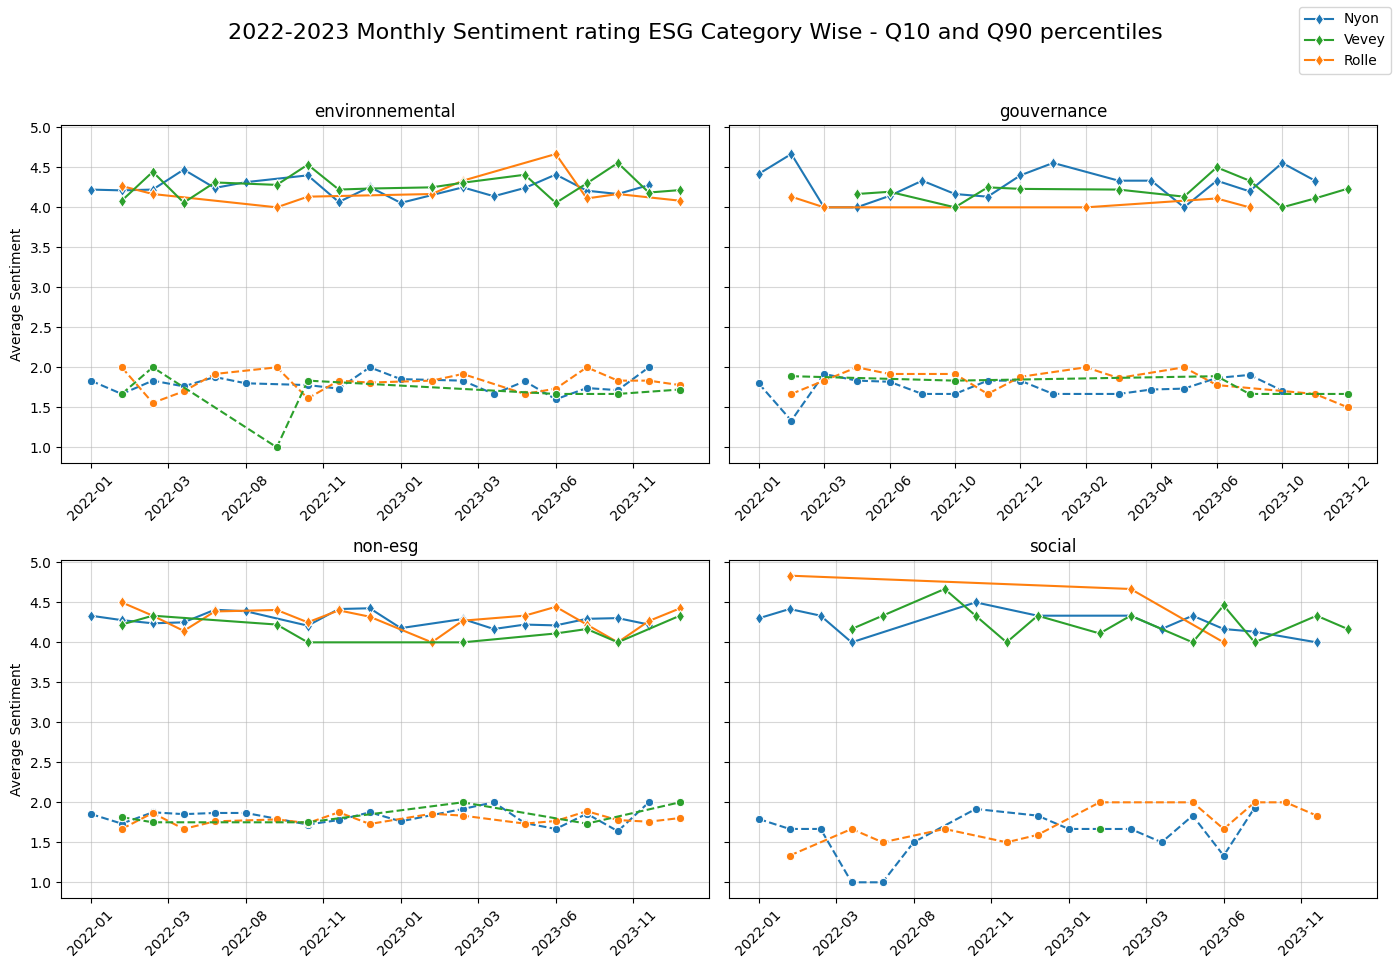

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the dataframes
combined_df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# Add a month_year column
combined_df['month_year'] = pd.to_datetime(combined_df['date']).dt.to_period('M')

# Calculate the average sentiment for each ESG predictor by city and month-year
average_sentiment_monthly = combined_df.groupby(['esg_predictor', 'city', 'month_year'])['sentiment_pred'].mean().reset_index()

# Calculate Q10 and Q90
q10_value = np.percentile(combined_df['sentiment_pred'], 10)
q90_value = np.percentile(combined_df['sentiment_pred'], 90)

# Calculate Q90 - (3 - Q10)
custom_metric_value = q90_value - (3 - q10_value)

# Filter the dataframe for Q10 and Q90 values
q10_data = combined_df[combined_df['sentiment_pred'] <= q10_value]
q90_data = combined_df[combined_df['sentiment_pred'] >= q90_value]

# Calculate the average sentiment for Q10 and Q90 for each ESG predictor by city and month-year
q10_average = q10_data.groupby(['esg_predictor', 'city', 'month_year'])['sentiment_pred'].mean().reset_index()
q90_average = q90_data.groupby(['esg_predictor', 'city', 'month_year'])['sentiment_pred'].mean().reset_index()

# Convert month_year to string for better plotting and ensure proper order
average_sentiment_monthly['month_year'] = average_sentiment_monthly['month_year'].astype(str)
q10_average['month_year'] = q10_average['month_year'].astype(str)
q90_average['month_year'] = q90_average['month_year'].astype(str)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

esg_predictors = average_sentiment_monthly['esg_predictor'].unique()

# Plot each ESG predictor
for i, esg_predictor in enumerate(esg_predictors):
    ax = axes[i]
    
    q10_df = q10_average[q10_average['esg_predictor'] == esg_predictor]
    q10_df = q10_df.sort_values('month_year')
    sns.lineplot(data=q10_df, x='month_year', y='sentiment_pred', hue='city', marker='o', ax=ax, linestyle='--')
    
    q90_df = q90_average[q90_average['esg_predictor'] == esg_predictor]
    q90_df = q90_df.sort_values('month_year')
    sns.lineplot(data=q90_df, x='month_year', y='sentiment_pred', hue='city', marker='d', ax=ax, linestyle='-')
    
    ax.set_title(esg_predictor)
    ax.set_ylabel('Average Sentiment')
    ax.set_xlabel('Month-Year')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.5)
    
    # xaxis change the frequency of the ticks
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_xlabel('')
    ax.legend().set_visible(False)

# Remove duplicate legends by combining them outside the loop
handles, labels = ax.get_legend_handles_labels()
unique_labels = {label: handle for handle, label in zip(handles, labels)}
fig.legend(unique_labels.values(), unique_labels.keys(), loc='upper right')

# Set the main title
plt.suptitle('2022-2023 Monthly Sentiment rating ESG Category Wise - Q10 and Q90 percentiles', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


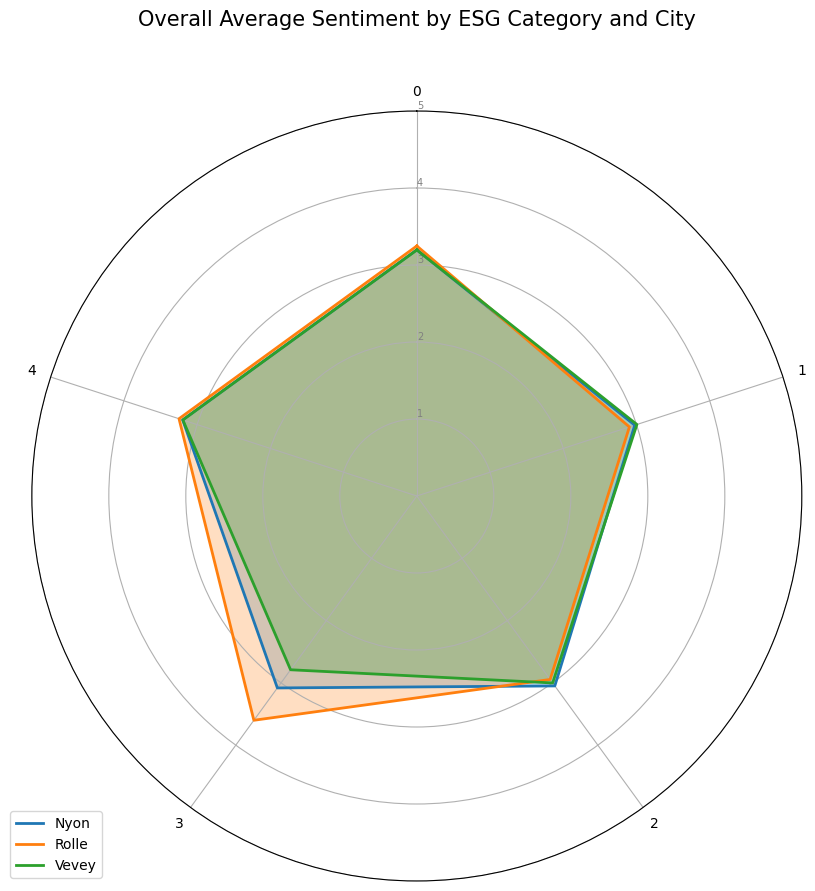

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Combine the dataframes (assuming combined_df is already created as before)
# combined_df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)
combined_df = pd.concat([nyon_2022,rolle_2022,vevey_2022],ignore_index=True)
# combined_df = pd.concat([nyon_2023,rolle_2023,vevey_2023],ignore_index=True)

# Calculate the overall average sentiment for each ESG predictor by city
average_sentiment_overall = combined_df.groupby(['esg_predictor', 'city'])['sentiment_pred'].mean().reset_index()

# Pivot the data to have cities as columns and ESG predictors as rows
df_pivot = average_sentiment_overall.pivot(index='esg_predictor', columns='city', values='sentiment_pred')

# Add a row for closing the circle on the radar chart using pd.concat
df_pivot = pd.concat([df_pivot, df_pivot.iloc[0:1]], ignore_index=True)

# Number of variables we're plotting (number of ESG predictors)
categories = df_pivot.index.tolist()

# Number of cities (columns in the dataframe)
cities = df_pivot.columns.tolist()

# Angle of each axis
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each city
for city in cities:
    values = df_pivot[city].tolist()
    values += values[:1]  # Ensure the plot is a closed loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=city)
    ax.fill(angles, values, alpha=0.25)

# Add labels to the chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
plt.ylim(0, 5)

# Add a title and a legend
plt.title('Overall Average Sentiment by ESG Category and City', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


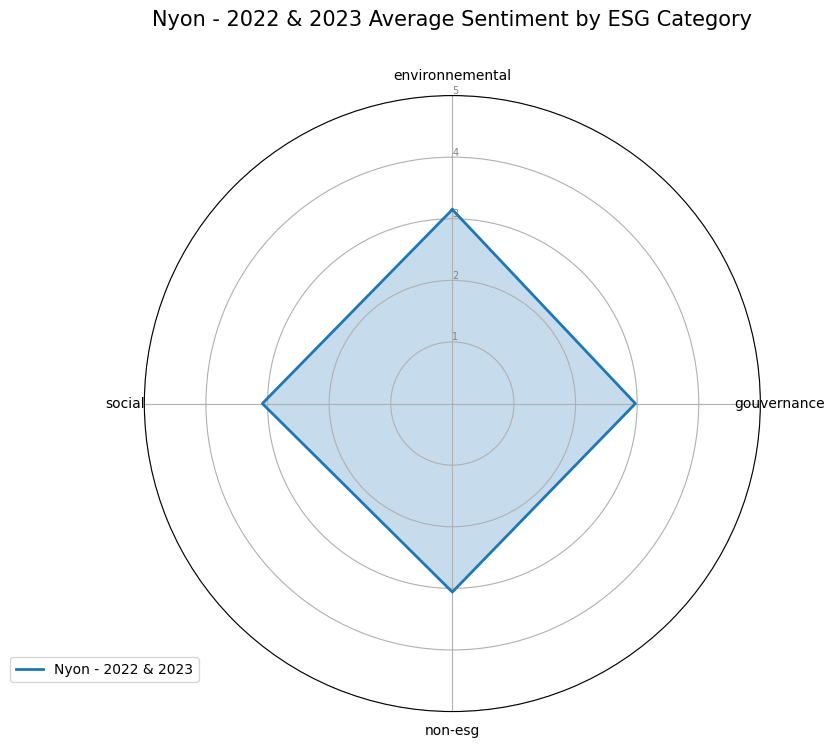

In [7]:
# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# Step 1: Filter the DataFrame for the selected city
selected_city = 'Nyon'  # Change to the desired city
filtered_df = df[df['city'] == selected_city]

# Step 2: Calculate the average sentiment for each ESG category for both years
average_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].mean()

# Ensure all categories are included
categories = average_sentiment.index.tolist()
values = average_sentiment.values.tolist()

# Step 3: Prepare the data for the spider chart
# To close the radar chart, we need to append the first value at the end
values += values[:1]
angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]  # Complete the loop

# Step 4: Initialize the spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'{selected_city} - 2022 & 2023')
ax.fill(angles, values, alpha=0.25)

# Add labels to the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
plt.ylim(0, 5)

# Add a title and legend
plt.title(f'{selected_city} - 2022 & 2023 Average Sentiment by ESG Category', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

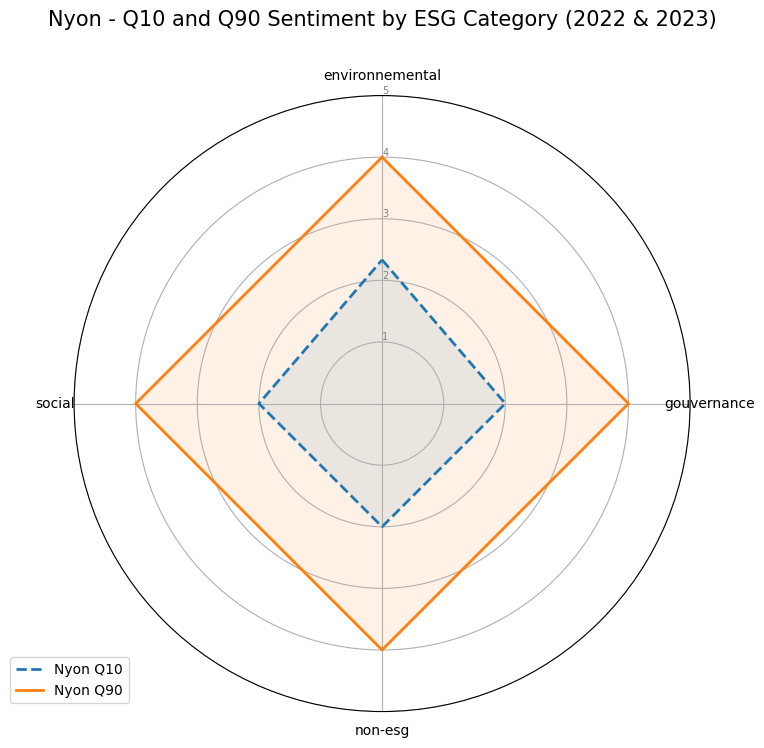

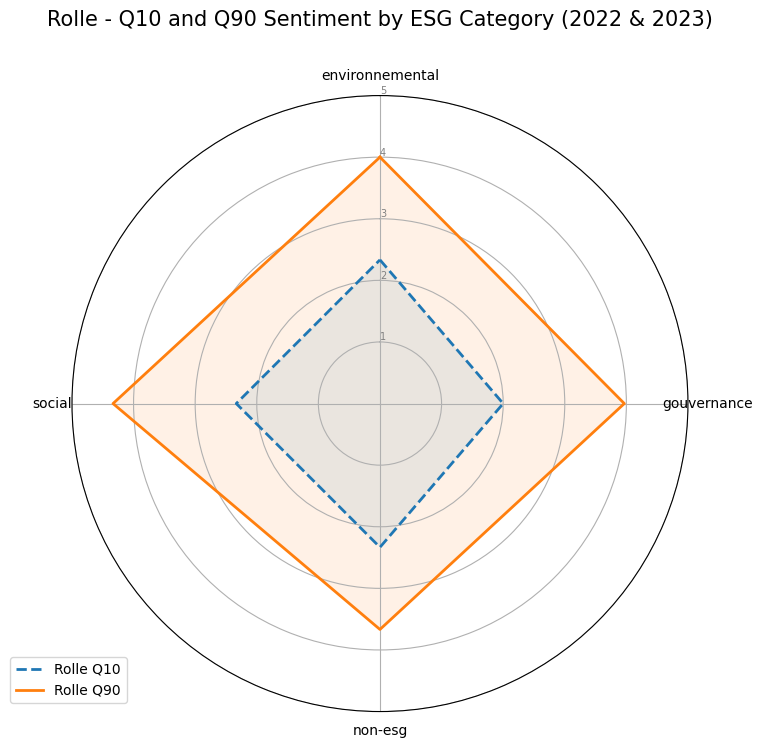

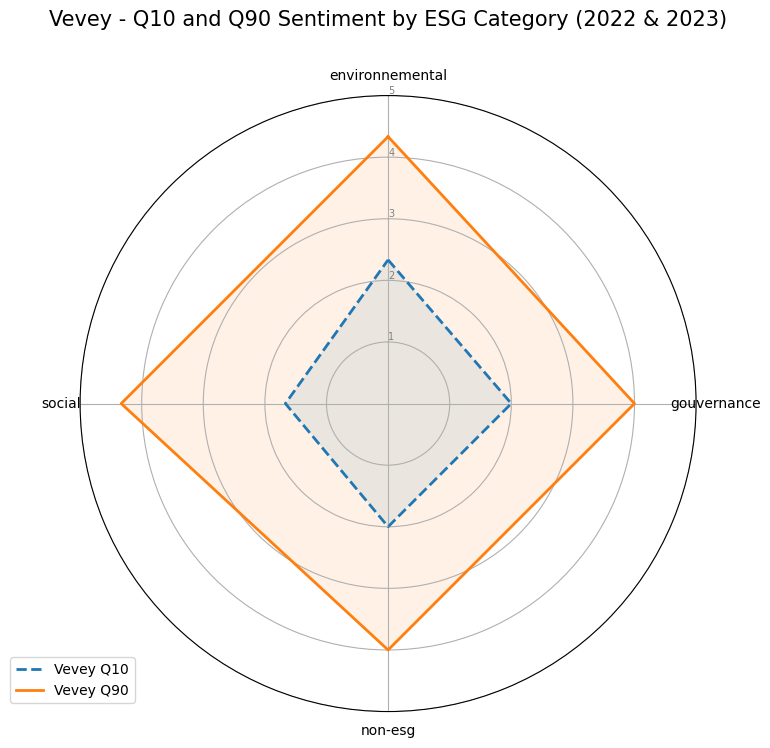

In [8]:
# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# List of cities
cities = ['Nyon', 'Rolle', 'Vevey']

# Loop over each city to create a separate spider chart
for city in cities:
    # Filter the DataFrame for the selected city
    filtered_df = df[df['city'] == city]

    # Calculate Q10 and Q90 for each ESG category
    q10_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.10)
    q90_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.90)

    # Ensure all categories are included
    categories = q10_sentiment.index.tolist()

    # Prepare the data for the spider chart
    q10_values = q10_sentiment.values.tolist()
    q90_values = q90_sentiment.values.tolist()

    # Add first value to close the chart loop
    q10_values += q10_values[:1]
    q90_values += q90_values[:1]
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]  # Complete the loop

    # Initialize the spider chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot Q10 and Q90 data for the city
    ax.plot(angles, q10_values, linewidth=2, linestyle='--', label=f'{city} Q10')
    ax.plot(angles, q90_values, linewidth=2, linestyle='-', label=f'{city} Q90')
    ax.fill(angles, q10_values, alpha=0.1)
    ax.fill(angles, q90_values, alpha=0.1)

    # Add labels to the chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
    plt.ylim(0, 5)

    # Add a title and legend
    plt.title(f'{city} - Q10 and Q90 Sentiment by ESG Category (2022 & 2023)', size=15, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the plot
    plt.show()

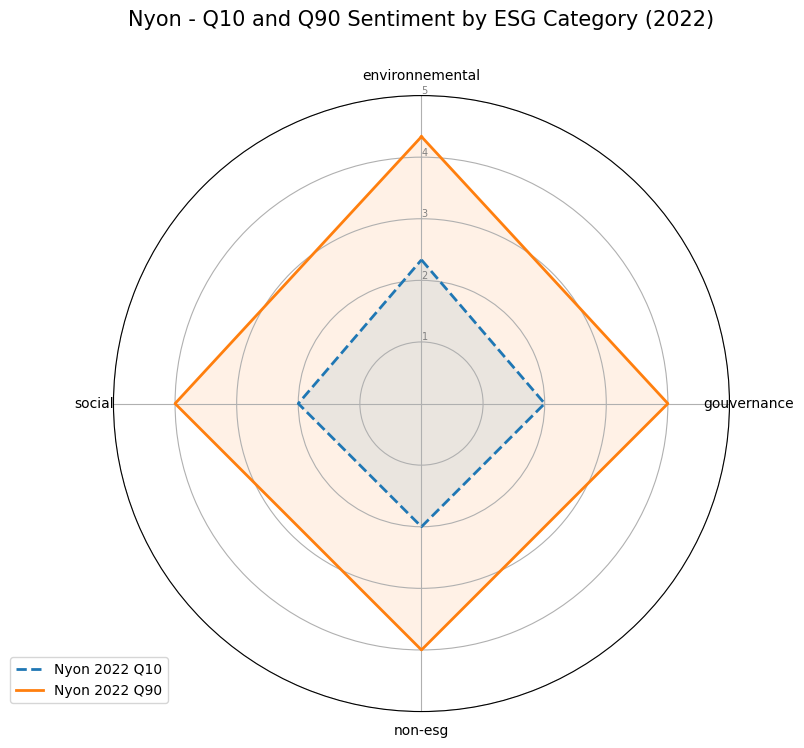

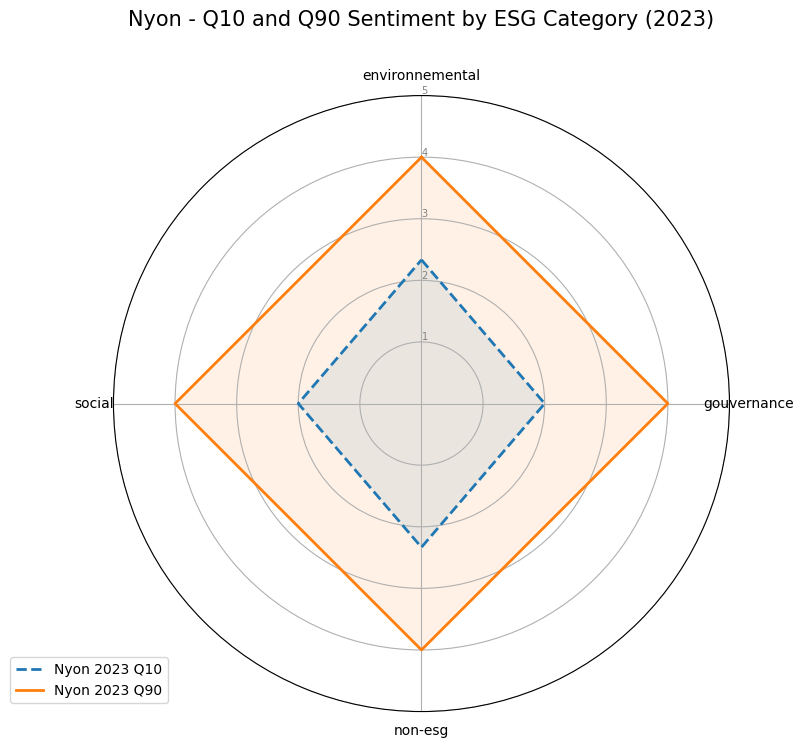

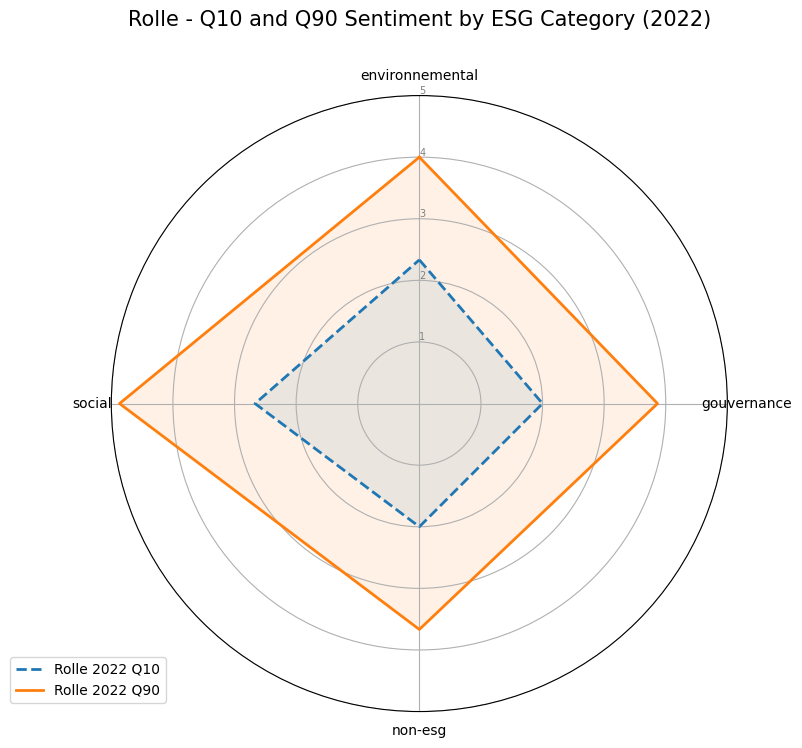

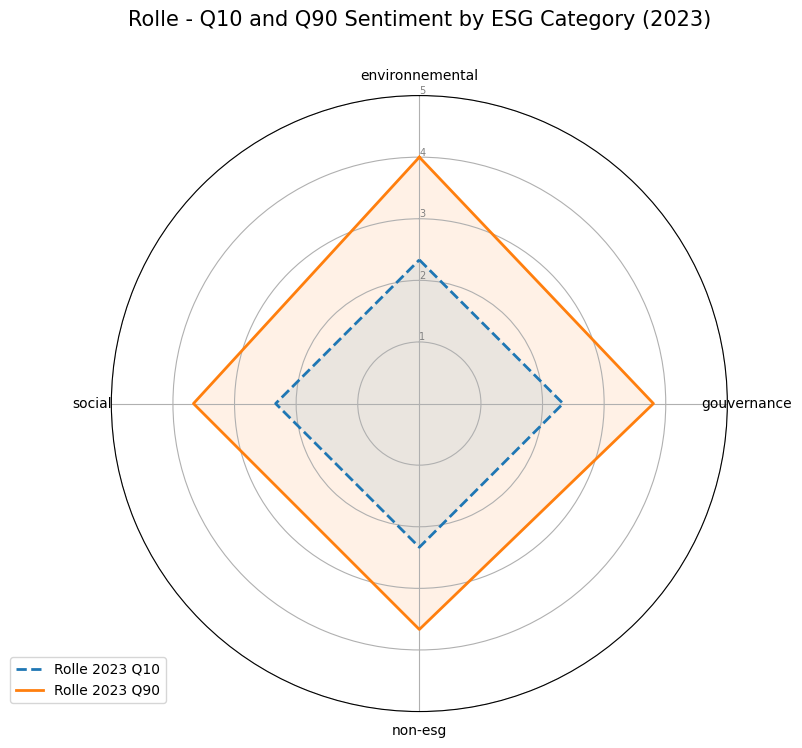

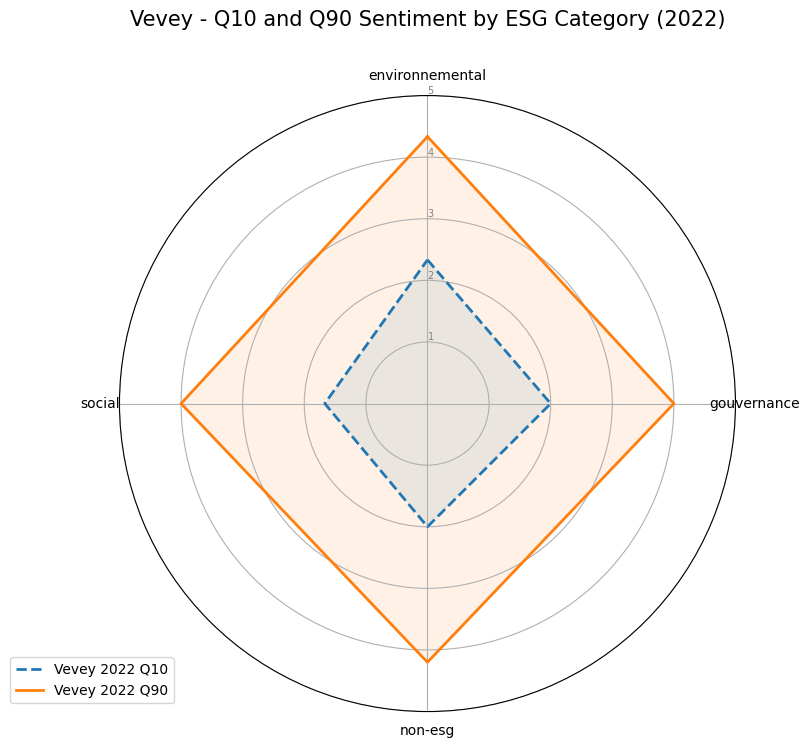

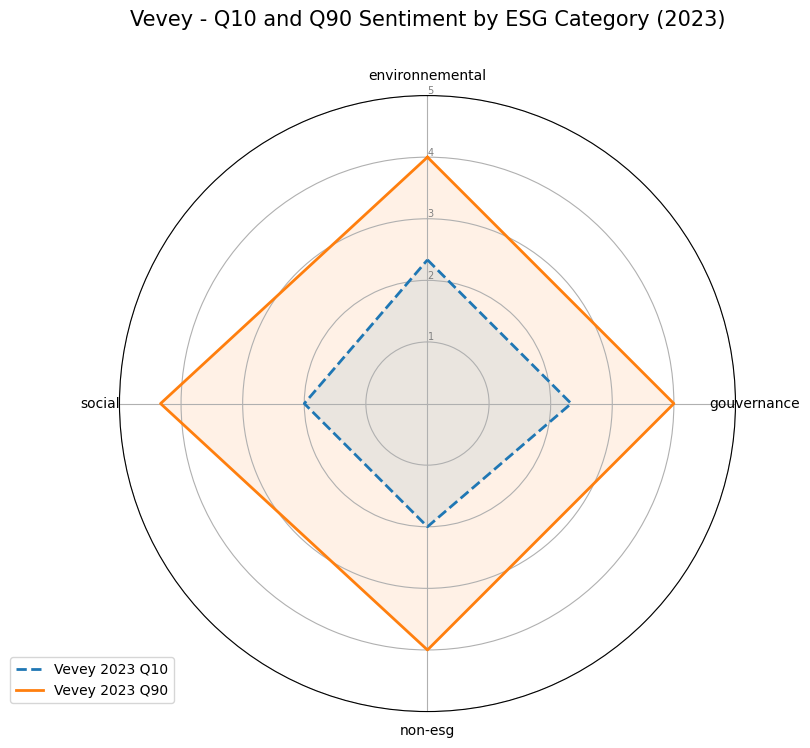

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# List of cities and years
cities = ['Nyon', 'Rolle', 'Vevey']
years = [2022, 2023]

# Loop over each city and year to create separate spider charts
for city in cities:
    for year in years:
        # Filter the DataFrame for the selected city and year
        filtered_df = df[(df['city'] == city) & (df['year'] == year)]

        # Calculate Q10 and Q90 for each ESG category
        q10_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.10)
        q90_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.90)

        # Ensure all categories are included
        categories = q10_sentiment.index.tolist()

        # Prepare the data for the spider chart
        q10_values = q10_sentiment.values.tolist()
        q90_values = q90_sentiment.values.tolist()

        # Add first value to close the chart loop
        q10_values += q10_values[:1]
        q90_values += q90_values[:1]
        angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
        angles += angles[:1]  # Complete the loop

        # Initialize the spider chart
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

        # Plot Q10 and Q90 data for the city and year
        ax.plot(angles, q10_values, linewidth=2, linestyle='--', label=f'{city} {year} Q10')
        ax.plot(angles, q90_values, linewidth=2, linestyle='-', label=f'{city} {year} Q90')
        ax.fill(angles, q10_values, alpha=0.1)
        ax.fill(angles, q90_values, alpha=0.1)

        # Add labels to the chart
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], categories)
        ax.set_rlabel_position(0)
        plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
        plt.ylim(0, 5)

        # Add a title and legend
        plt.title(f'{city} - Q10 and Q90 Sentiment by ESG Category ({year})', size=15, color='black', y=1.1)
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        # Show the plot
        plt.show()


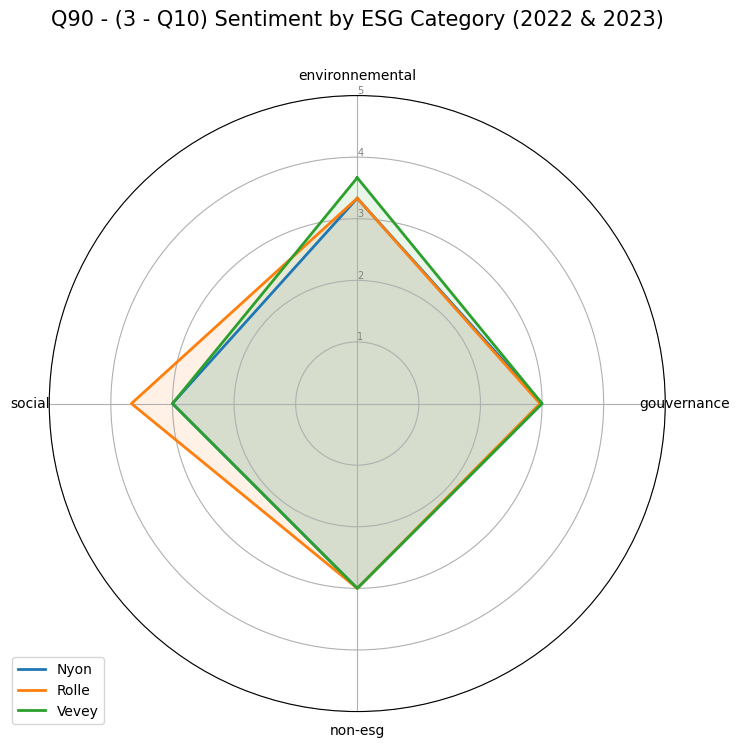

In [9]:
# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# List of cities
cities = ['Nyon', 'Rolle', 'Vevey']

# Initialize the spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop over each city to add it to the chart
for city in cities:
    # Filter the DataFrame for the selected city
    filtered_df = df[df['city'] == city]

    # Calculate Q10 and Q90 for each ESG category
    q10_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.10)
    q90_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.90)

    # Compute the custom metric Q90 - (3 - Q10)
    custom_metric = q90_sentiment - (3 - q10_sentiment)

    # Ensure all categories are included
    categories = custom_metric.index.tolist()

    # Prepare the data for the spider chart
    custom_values = custom_metric.values.tolist()

    # Add first value to close the chart loop
    custom_values += custom_values[:1]
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]  # Complete the loop

    # Plot the custom metric for the city
    ax.plot(angles, custom_values, linewidth=2, linestyle='-', label=f'{city}')
    ax.fill(angles, custom_values, alpha=0.1)

# Add labels to the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
plt.ylim(0, 5)

# Add a title and legend
plt.title('Q90 - (3 - Q10) Sentiment by ESG Category (2022 & 2023)', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

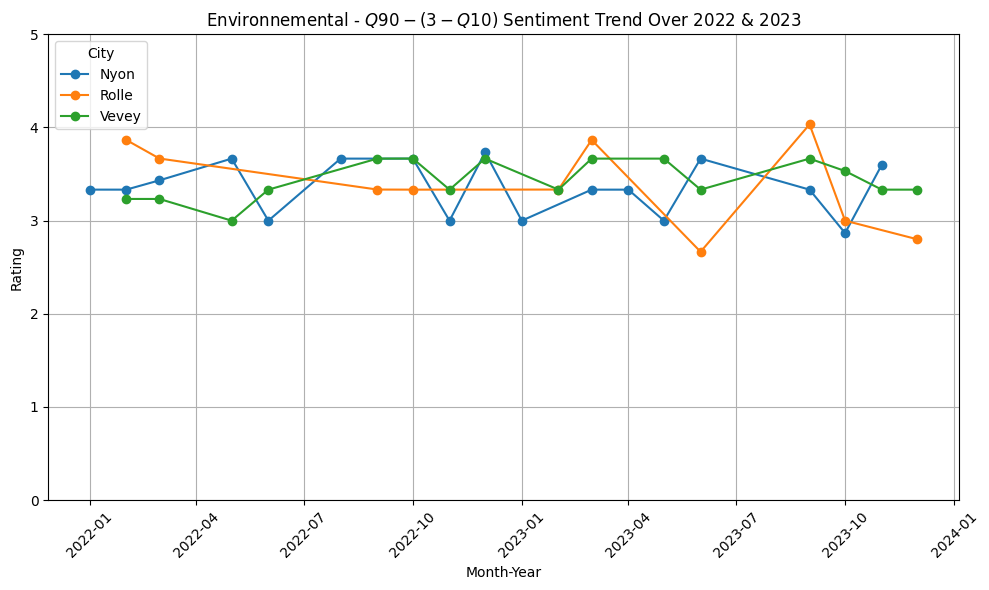

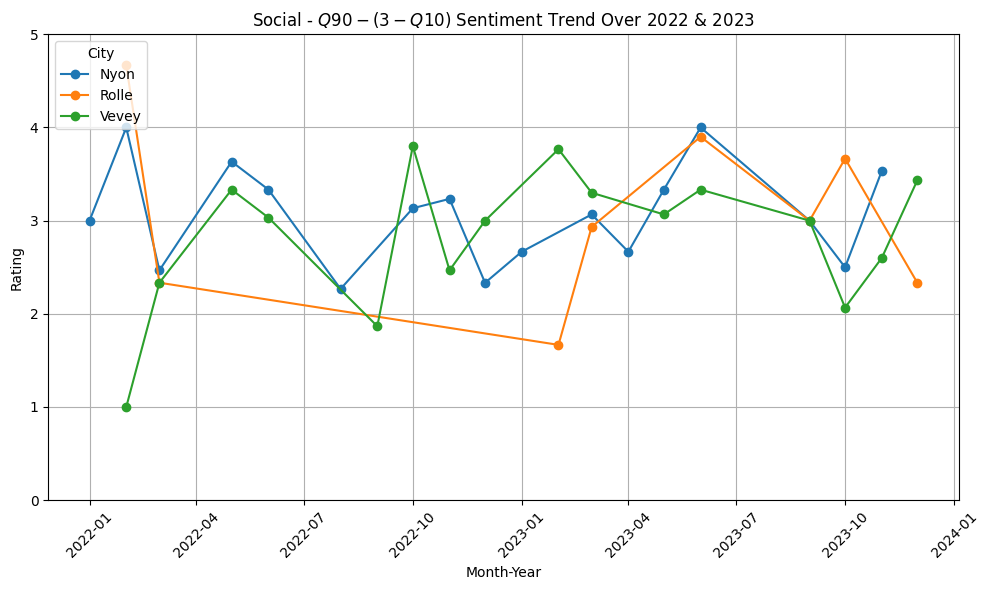

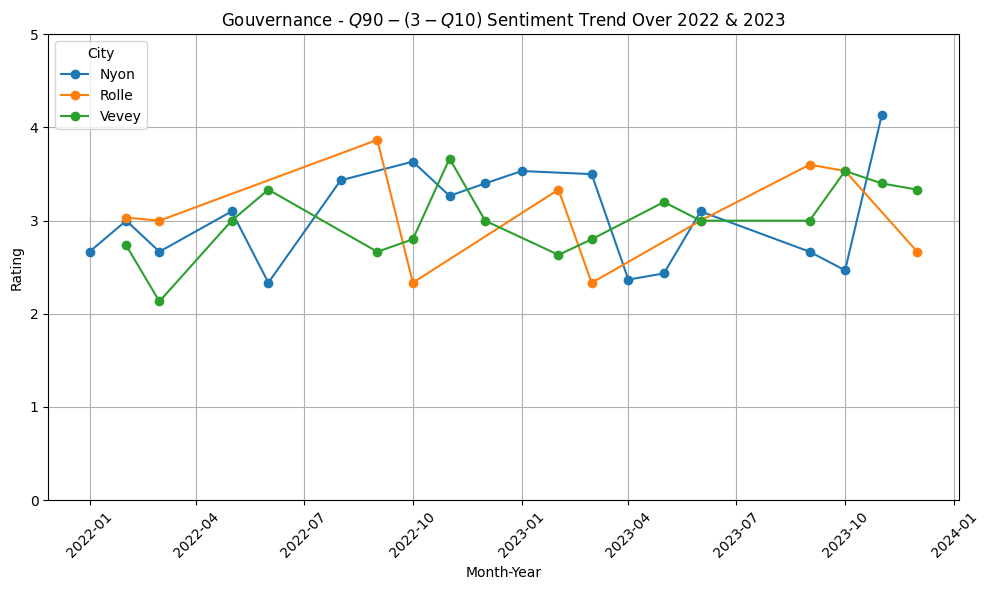

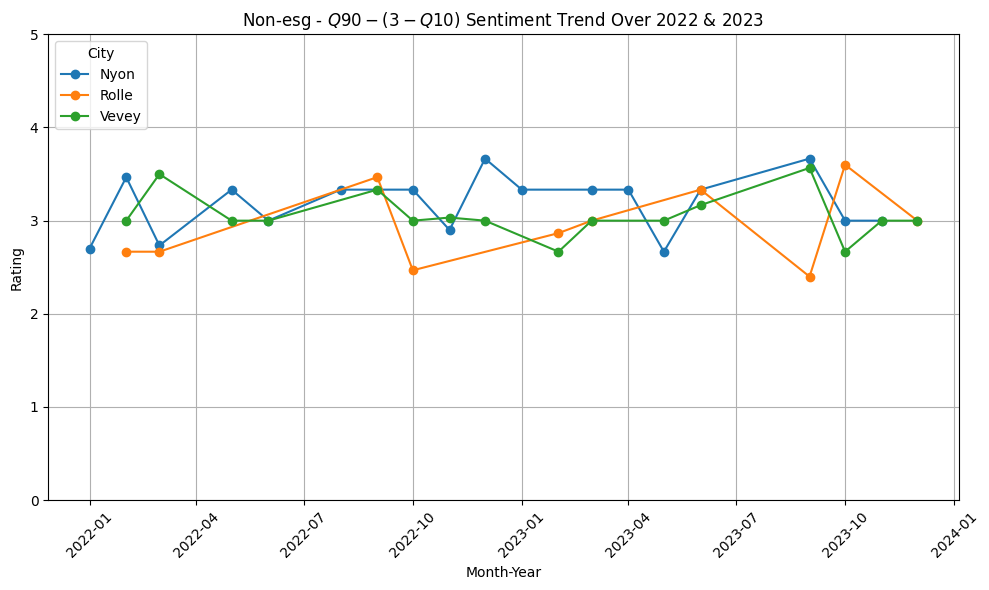

In [14]:
# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# Convert 'date' to datetime and extract month-year for grouping
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Sort the DataFrame by 'month_year'
df = df.sort_values(by='month_year')

# List of cities and ESG categories
cities = ['Nyon', 'Rolle', 'Vevey']
esg_categories = ['environnemental', 'social', 'gouvernance', 'non-esg']

# Create a plot for each ESG category
for category in esg_categories:
    plt.figure(figsize=(10, 6))

    # Loop over each city to add it to the chart
    for city in cities:
        # Filter the DataFrame for the selected city and ESG category
        filtered_df = df[(df['city'] == city) & (df['esg_predictor'] == category)]

        # Group by month-year and calculate Q10 and Q90
        q10_sentiment = filtered_df.groupby('month_year')['sentiment_pred'].quantile(0.10)
        q90_sentiment = filtered_df.groupby('month_year')['sentiment_pred'].quantile(0.90)

        # Compute the custom metric Q90 - (3 - Q10)
        custom_metric = q90_sentiment - (3 - q10_sentiment)

        # Plot the trend for the custom metric
        plt.plot(custom_metric.index, custom_metric, marker='o', label=f'{city}')

    # Customize the plot
    # plt.title(f'{category.capitalize()} - Q90 - (3 - Q10) Sentiment Trend Over 2022 & 2023', size=15, fontstyle = "italic")
    plt.title(f"{category.capitalize()} " + r"- $\it{Q90 - (3 - Q10)}$ Sentiment Trend Over 2022 & 2023")
    plt.xlabel('Month-Year')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    plt.grid(True)

    # Add legend
    plt.legend(loc='upper left', title="City")

    # Show the plot
    plt.tight_layout()
    plt.show()

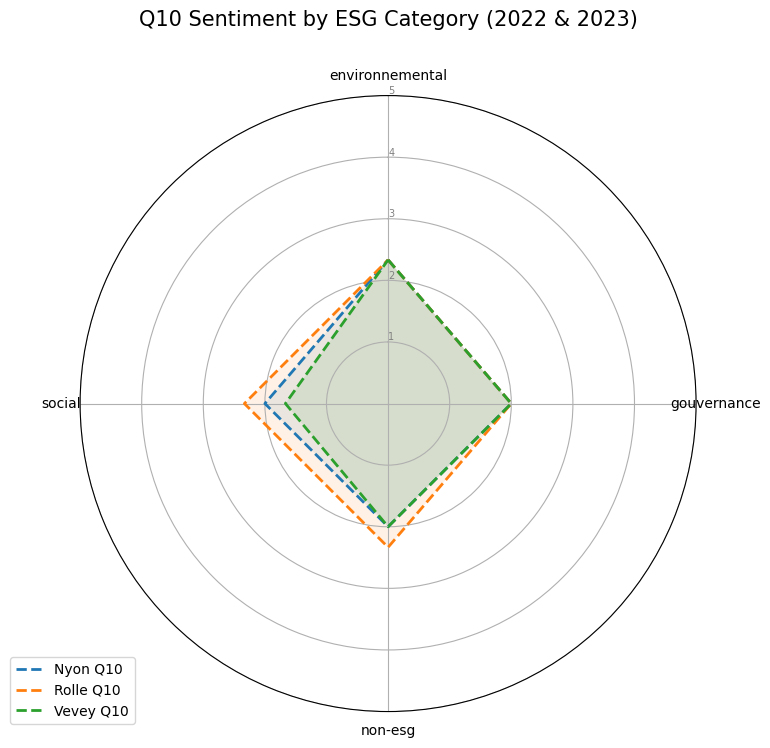

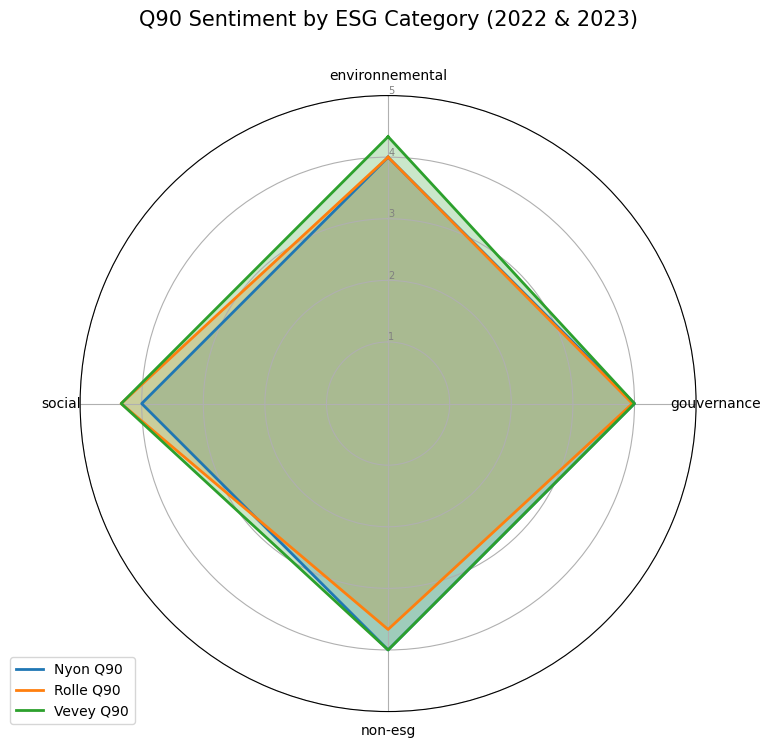

In [8]:
# Concatenate the dataframes into one for both years
df = pd.concat([nyon_2022, nyon_2023, rolle_2022, rolle_2023, vevey_2022, vevey_2023], ignore_index=True)

# List of cities
cities = ['Nyon', 'Rolle', 'Vevey']

# First figure for Q10 values
fig1, ax1 = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Second figure for Q90 values
fig2, ax2 = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop over each city to calculate Q10 and Q90
for city in cities:
    # Filter the DataFrame for the selected city
    filtered_df = df[df['city'] == city]

    # Calculate Q10 and Q90 for each ESG category
    q10_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.10)
    q90_sentiment = filtered_df.groupby('esg_predictor')['sentiment_pred'].quantile(0.90)

    # Ensure all categories are included
    categories = q10_sentiment.index.tolist()

    # Prepare the data for the spider chart
    q10_values = q10_sentiment.values.tolist()
    q90_values = q90_sentiment.values.tolist()

    # Close the chart loop by adding the first value to the end of the list
    q10_values += q10_values[:1]
    q90_values += q90_values[:1]
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]  # Complete the loop

    # Plot Q10 in the first figure with dotted lines
    ax1.plot(angles, q10_values, linewidth=2, linestyle='--', label=f'{city} Q10')
    ax1.fill(angles, q10_values, alpha=0.1)

    # Plot Q90 in the second figure with solid lines
    ax2.plot(angles, q90_values, linewidth=2, linestyle='-', label=f'{city} Q90')
    ax2.fill(angles, q90_values, alpha=0.25)

# Customize the first figure (Q10)
ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)
plt.sca(ax1)
plt.xticks(angles[:-1], categories)
ax1.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
ax1.set_ylim(0, 5)
ax1.set_title('Q10 Sentiment by ESG Category (2022 & 2023)', size=15, color='black', y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Customize the second figure (Q90)
ax2.set_theta_offset(np.pi / 2)
ax2.set_theta_direction(-1)
plt.sca(ax2)
plt.xticks(angles[:-1], categories)
ax2.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
ax2.set_ylim(0, 5)
ax2.set_title('Q90 Sentiment by ESG Category (2022 & 2023)', size=15, color='black', y=1.1)
ax2.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plots
plt.show()

In [10]:
# wordclou

,text,esg_predictor,sentiment_pred,source,date,city,year
0,1. \n\nAppel : \n\n80 Conseillères et Conseil...,non-esg,4.000,2201,2022-01-01,Nyon,2022
1,"les Municipaux Claude ULDRY, \nAlexandre DÉMÉT...",gouvernance,4.000,2201,2022-01-01,Nyon,2022
2,Elle ouvre cette \ncinquième séance du Cons...,non-esg,3.667,2201,2022-01-01,Nyon,2022
3,Le Bureau a étudié les conditions de mi...,non-esg,4.000,2201,2022-01-01,Nyon,2022
4,"Dans ce cadre, une séance du Bureau du Conseil...",non-esg,4.667,2201,2022-01-01,Nyon,2022
...,...,...,...,...,...,...,...
7333,Cornu constate pour sa part l’état technique d...,non-esg,3.000,2312,2023-12-01,Vevey,2023
7334,Ce n’est pas un article très sympa \nenvers la...,non-esg,2.667,2312,2023-12-01,Vevey,2023
7335,"Il a changé de mains, mais à l’origine c’était...",environnemental,4.000,2312,2023-12-01,Vevey,2023
7336,Séances du Conseil communal des 7 et 14 décemb...,environnemental,3.667,2312,2023-12-01,Vevey,2023
